In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from flood_tool.lat_long_conversion import CustomScaler

In [2]:
data = pd.read_csv('resources/postcodes_sampled.csv')

In [3]:
data

,postcode,sector,easting,northing,localAuthority,altitude,soilType,riskLabel,medianPrice
0,PO7 8PR,PO7 8,469395.0,108803.0,Havant,30,Planosols,1,233500.0
1,SO17 1NS,SO17 1,442771.0,114321.0,Southampton,20,Unsurveyed/Urban,1,291800.0
2,TN28 8XN,TN28 8,606861.0,124689.0,Folkestone and Hythe,10,Cambisols,1,326500.0
3,KT3 4JW,KT3 4,521649.0,168848.0,Kingston upon Thames,20,Unsurveyed/Urban,1,875200.0
4,CT2 8AA,CT2 8,614532.0,158074.0,Canterbury,10,Unsurveyed/Urban,10,303500.0
...,...,...,...,...,...,...,...,...,...
39995,SE22 8BE,SE22 8,533403.0,175417.0,Southwark,20,Unsurveyed/Urban,1,674300.0
39996,SW10 0JB,SW10 0,526500.0,177609.0,Kensington and Chelsea,0,Unsurveyed/Urban,1,884900.0
39997,HP21 9QS,HP21 9,482072.0,211761.0,Buckinghamshire,90,Cambisols,1,302000.0
39998,TN15 8NY,TN15 8,560877.0,157522.0,Tonbridge and Malling,90,Luvisols,1,190000.0


In [4]:
data.duplicated().sum()

0

In [5]:
X = data[['easting', 'northing']]
y = data['riskLabel']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
X_train.isnull().sum()

easting     0
northing    0
dtype: int64

<AxesSubplot: >

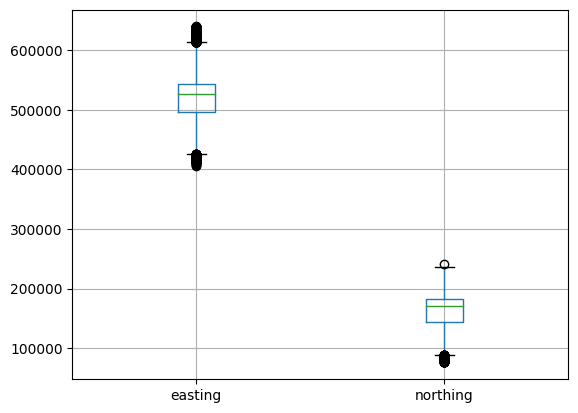

In [8]:
X_train.boxplot()

In [9]:
X_train[X_train.northing > 200000]

,easting,northing
6200,495225.0,201431.0
39854,481662.0,214861.0
20826,446430.0,204056.0
34555,495021.0,202421.0
5910,496054.0,202522.0
...,...,...
36091,481988.0,213740.0
13353,483466.0,213941.0
15270,498152.0,203408.0
38207,470134.0,205158.0


In [10]:
from sklearn import set_config

set_config(display='diagram')

In [11]:
pipe = Pipeline([('loc_conversion', CustomScaler()),('num_imputer', SimpleImputer(strategy='median')), 
                 ('num_scaler', StandardScaler()), ('classifier', RandomForestRegressor(max_depth=27, min_samples_leaf=2, n_estimators=100))])
pipe

Pipeline(steps=[('loc_conversion', CustomScaler()),
                ('num_imputer', SimpleImputer(strategy='median')),
                ('num_scaler', StandardScaler()),
                ('classifier',
                 RandomForestRegressor(max_depth=27, min_samples_leaf=2))])

In [12]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('loc_conversion', CustomScaler()),
                ('num_imputer', SimpleImputer(strategy='median')),
                ('num_scaler', StandardScaler()),
                ('classifier',
                 RandomForestRegressor(max_depth=27, min_samples_leaf=2))])

In [13]:
y_pred = pipe.predict(X_test)

In [14]:
pipe.score(X_test, y_test)

0.33896594174286476

In [15]:
mean_squared_error(y_test, y_pred)

1.3075523548661445